<a href="https://colab.research.google.com/github/VygovskayaNatalya/Lesson1_Python/blob/main/%C2%ABPandasSQL_%7C_%D0%A3%D0%98%D0%98%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pandas**

## Знакомство с библиотекой

In [ ]:
# Загрузка модуля pandas
import pandas as pd

### ***Создать таблицу***




> *Вариант 1 (без указания индексов)*

Вовсе необязательно проставлять индексы в списке, поскольку они автоматически нумеруются, начиная с нуля: 0, 1, 2, 3... и так далее. Но в таблице, которую вы воссоздаете, индексы указаны не по порядку. Поэтому вам нужно самостоятельно создать список с нужными индексами.

Помните, что индекс нужен для того, чтобы идентифицировать каждую строчку. Поэтому они не должны повторяться:

In [ ]:
columns = ['Name', 'Language']

data = [['John', 'Python'],
        ['Michael', 'SQL'],
        ['Jessica', 'C++'],
        ['Jennifer', 'C#'],
        ['Sarah', 'Kotlin']]

Пока что вы создали две переменные, которые не имеют никакой связи между собой.

Чтобы связать эти данные и образовать датафрейм, используйте метод `.DataFrame`.

Этот метод принимает следующие параметры:
- список с данными;
- columns - список с названиями столбцов;

Теперь создайте датафрейм и выведите его на экран:


In [ ]:
df = pd.DataFrame(data, columns=columns)
print(df)

Выглядит не очень красиво. Запомните эту особенность и впредь не используйте print() для отображения датафреймов. Вместо этого либо просто пишите название датафрейма в последней строке, либо воспользуйтесь функцией display():

In [ ]:
# display(df)
df # DataFrame должен быть на последней строке
# print('hello') # print стирает df, но не повлияет на display()

> *Вариант 2 (с указанием индексов)*

In [ ]:
data = [['John', 'Python'],
        ['Michael', 'SQL'],
        ['Jessica', 'C++'],
        ['Jennifer', 'C#'],
        ['Sarah', 'Kotlin']]

columns = ['Name', 'Language']

index = [100, 200, 300, 400, 500] # Создание списка с индексами строк

df2 = pd.DataFrame(data, columns=columns, index=index)
df2

In [ ]:
print('\033[34mПервый датафрейм:\033[0m')

display(df)
print()

print('\033[35mВторой датафрейм:\033[0m')
display(df)

> **Series**

In [ ]:
ages = pd.Series([30, 20, 22, 40], index=['Иван', 'Мария', 'Петр', 'Николай'], name='Возраст')
display(ages)
type(ages)

Иван       30
Мария      20
Петр       22
Николай    40
Name: Возраст, dtype: int64

pandas.core.series.Series

Вот и все! Таким образом вы самостоятельно создали датасет. Но такой подход вы редко будете использовать. Куда чаще вам нужно будет создавать датафреймы из уже готовых файлов.

### ***Загрузка и запись данных***

---



#### *Вариант 1 (загрузка через gdown)*

**gdown.download()** - вызов функции download() из библиотеки gdown \
- 'https://storage.yandexcloud.net/aiueducation/Content/base/l9/wine_base.csv' - ссылка для скачивания файла
- **None** - путь для сохранения файла локально. Значение None сохранит файл в текущую директорию с исходным именем.
- **quiet=True**- не выводить информацию о ходе скачивания.
Таким образом, эта строка скачает файл wine_base.csv по указанной ссылке и сохранит его в текущую директорию без вывода сообщений о статусе.

> *gdown удобно использовать для скачивания файлов по ссылкам из Google Drive для последующей работы с ними локально.*

In [ ]:
# Загрузка файла из облака в colab
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l9/wine_base.csv', None, quiet=True)

'wine_base.csv'

Функции вида `pd.read_формат()` и `pd.to_формат()`
считывают и записывают данные соответственно.

Cчитайте данные в формате **csv** (***comma separated value/значения, разделённые запятыми***) функцией <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv"> `pd.read_csv()`</a>.

Список самых важных аргументов:
 - **filepath_or_buffer** - текстовая строка с названием (адресом) файла;
 - **sep** - символ, которым отделены элементы датафрейма в файле (по умолчанию ",");
 - **header** - номер строки, в которой в файле указаны названия столбцов (**None**, если нет);
 - **names** - список с названиями столбцов;
 - **index_col** - столбец, из которого надо взять названия строк (номер столбца, список или ничего).
 - **usecols** - список столбцов для чтения из файла

In [ ]:
pd.read_? # читаем
pd.to_? # сохраняем

Создадайте переменную **data**, в которую с помощью функции `pd.read_csv()` загрузите данные из файла **wine_base.csv**:

In [ ]:
data = pd.read_csv('wine_base.csv')
data.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz


Таблица полностью загрузилась, но что-то не так с первым столбцом. Дело в том, что в исходном файле уже была информация об индексах. И вы, создавая датафрейм, также проиндексировали строки. В итоге информация дублируется.

Чтобы это исправить, при создании датафрейма укажите параметр `index_col=0`. Теперь информация об индексах будет взята из нулевого столбца. Проверьте результат:


In [ ]:
data = pd.read_csv('wine_base.csv', index_col=0)
data.head(1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz


In [ ]:
names = ['страна', 'описание', 'наименование', 'баллы', 'цена', 'провинция', 'регион_1', 'регион_2', 'сорт', 'винодельня']

data = pd.read_csv('wine_base.csv', names=names, index_col=0)
data.head()

<ipython-input-9-788fb763a30a>:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('wine_base.csv', names=names, index_col=0)


,страна,описание,наименование,баллы,цена,провинция,регион_1,регион_2,сорт,винодельня
NaN,country,description,designation,points,price,province,region_1,region_2,variety,winery
0.0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1.0,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2.0,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3.0,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi


In [ ]:
names = ['страна', 'описание', 'наименование', 'баллы', 'цена', 'провинция', 'регион_1', 'регион_2', 'сорт', 'винодельня']

data = pd.read_csv('wine_base.csv', names=names, index_col=0, header=1)
data.head()

,страна,описание,наименование,баллы,цена,провинция,регион_1,регион_2,сорт,винодельня
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia


In [ ]:
data3 = pd.read_csv('wine_base.csv', usecols=['country', 'points', 'price'])
data3.head(3)

,country,points,price
0,US,96,235.0
1,Spain,96,110.0
2,US,96,90.0


#### *Вариант 2 (загрузка  напрямую)*

In [ ]:
url = 'https://storage.yandexcloud.net/aiueducation/Content/base/l9/wine_base.csv'

data = pd.read_csv(url, index_col=0)
data

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


#### ***head / tail***

In [ ]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


По такому же принципу работает метод `.tail()`, только выводит *последние* пять строк (или другое количество, которое укажете в скобках):

In [ ]:
data.tail()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset
150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder


In [ ]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

## ***Анализ данных***

---



Вы загрузили файл с данными и считали его с помощью библиотеки Pandas. Теперь проанализируйте эти данные:
- посчитайте, сколько всего записей вы имеете;
- посмотрите, какого типа данные;
- проверьте, есть ли пропуски. Если да, то сколько их.


### Базовые методы

Метод .`shape` возвращает размер датафрейма: количество строк и количество столбцов

In [ ]:
data.shape

(150930, 10)

Метод `.size` возвращает количество элементов в таблице:

In [ ]:
data.size

1509300

Иногда данные в некоторых ячейках таблицы пропущены. Это случается по разным причинам: возможно, данных по определенному элементу просто не было, а возможно, человек, который заполнял таблицу, случайно пропустил ячейку.

Метод `.count()` возвращает количество *непустых* записей в каждом столбце:

In [ ]:
print(data.shape, end='\n\n')
data.count()

(150930, 10)



country        150925
description    150930
designation    105195
points         150930
price          137235
province       150925
region_1       125870
region_2        60953
variety        150930
winery         150930
dtype: int64

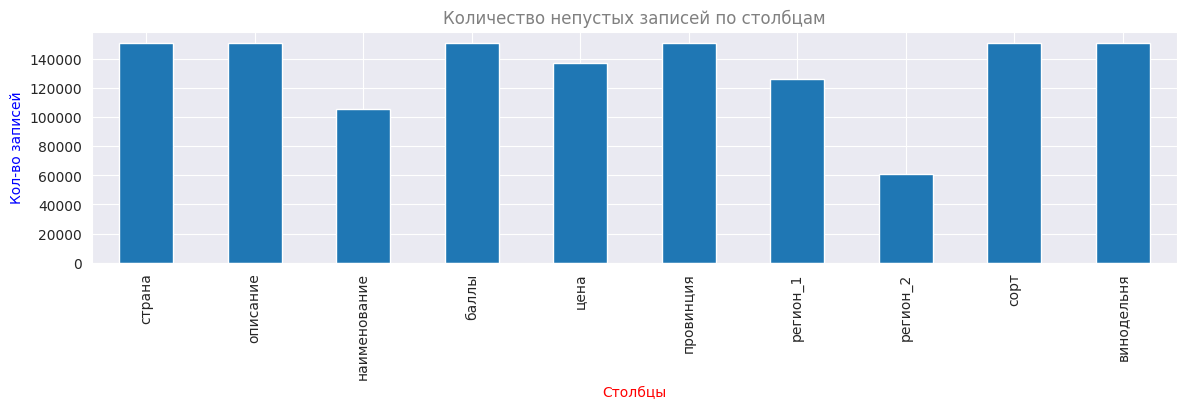

In [ ]:
# @title График data.count
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=(14,3))
counts = data.count()
ax = counts.plot.bar()
ax.set_xlabel('Столбцы', c='r')
ax.set_ylabel('Кол-во записей', c='b')
ax.set_title('Количество непустых записей по столбцам', c='gray')


plt.show()

Используя метод `.head()`, вы можете применить метод `.count()` только к первым ста строкам таблицы:

In [ ]:
data.head(100).count() # 0 - 100

страна          100
описание        100
наименование     83
баллы           100
цена             96
провинция       100
регион_1         92
регион_2         43
сорт            100
винодельня      100
dtype: int64

In [ ]:
data[100:200].count() # 100 - 200

страна          100
описание        100
наименование     69
баллы           100
цена             99
провинция       100
регион_1         87
регион_2         56
сорт            100
винодельня      100
dtype: int64

Метод `.dtypes` возвращает тип данных каждого столбца:

In [ ]:
data.dtypes

страна           object
описание         object
наименование     object
баллы             int64
цена            float64
провинция        object
регион_1         object
регион_2         object
сорт             object
винодельня       object
dtype: object

**Типы данных:**


---



---



- object - строковый тип данных, для хранения текстовых значений
- int64 - целочисленный тип, занимает 64 бита
- float64 - тип с плавающей точкой (вещественные числа), занимает 64 бита
- bool - логический тип данных для хранения значений True/False
- datetime64 - тип для хранения дат и времени
- timedelta64 - тип для хранения промежутков времени
- category - тип для категориальных данных (ограниченный набор значений)

---



Метод `.info()` сочетает в себе методы `.count` и `.dtypes`. Он возвращает:
- количество непустых записей в каждом столбце;
- тип данных каждого столбца;
- сколько раз встречается каждый тип данных;
- сколько места занимает датафрейм.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


Ячейки со значением **NaN** - это пустые ячейки. Например, первые 2 ячейки столбца **region_2** пустые.

Метод `.isna()` выдает таблицу того же размера, что и исходная, только заменяет значения в ячейках на **True** или **False**.
- **True** - если ячейка *пуста*
- **False** - если ячейка *заполнена*

In [ ]:
data.isna().head()

,страна,описание,наименование,баллы,цена,провинция,регион_1,регион_2,сорт,винодельня
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False,True,False,False


In [ ]:
data.head()

,страна,описание,наименование,баллы,цена,провинция,регион_1,регион_2,сорт,винодельня
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia


Сравните эту таблицу с исходной. Почти все ячейки имеют значение **False**, так как в исходной таблице они заполнены. Но те ячейки, которые были пусты, получили значение **True**.
Такой подход позволяет очень легко подсчитать количество пропусков в каждом столбце с помощью метода `.sum()`:

In [ ]:
data.isna().sum()

страна              5
описание            0
наименование    45735
баллы               0
цена            13695
провинция           5
регион_1        25060
регион_2        89977
сорт                0
винодельня          0
dtype: int64

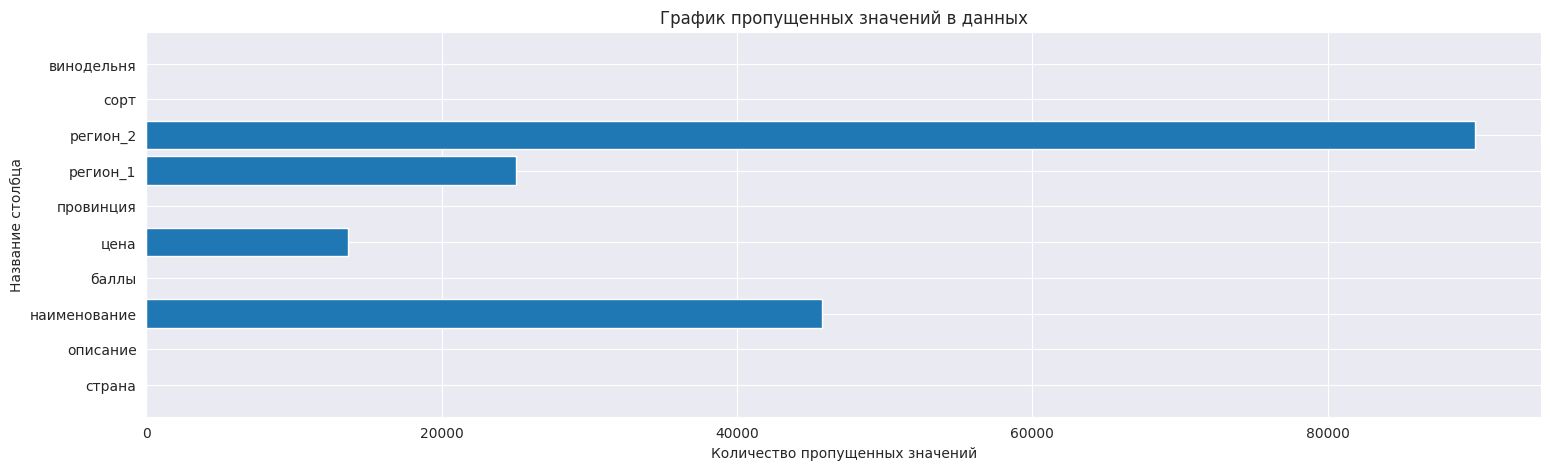

In [ ]:
# @title График data.isna().sum()
import matplotlib.pyplot as plt
import pandas as pd


# Подсчитайте количество пропущенных значений по столбцам
missing_values = data.isna().sum()

plt.figure(figsize=(18,5))
# Создайте горизонтальный столбчатый график с подписями осей и заголовком
plt.barh(missing_values.index, missing_values.values)
plt.xlabel("Количество пропущенных значений")
plt.ylabel("Название столбца")
plt.title("График пропущенных значений в данных")
plt.show()

Для наглядности вычислите долю пропусков от общего количества элементов:

In [ ]:
data.isna().sum() / data.shape[0]

страна          0.000033
описание        0.000000
наименование    0.303023
баллы           0.000000
цена            0.090738
провинция       0.000033
регион_1        0.166038
регион_2        0.596154
сорт            0.000000
винодельня      0.000000
dtype: float64

Чтобы вычислить общее количество пропусков во всей таблице, примените метод `.sum()` два раза:

In [ ]:
data.isna().sum().sum()

174477

Переведите полученное значение в проценты. Для этого поделите количество пропусков на количество ячеек и умножьте на 100:

In [ ]:
proc = data.isna().sum().sum() / data.size
print('{:.1%}'.format(proc))

11.6%


Вы обнаружили пропуски, но что с ними делать? Ячейки без информации можно удалять и заполнять самостоятельно. Рассмотрите подробнее каждый вариант.

In [ ]:
# Выведем первые 5 строк для наглядности
data.head()

,страна,описание,наименование,баллы,цена,провинция,регион_1,регион_2,сорт,винодельня
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia


## ***Удалить данные***


---





В Pandas есть несколько способов удалить данные из DataFrame:

***Удалить строки:***
- data.drop(index) - удалить строки с указанными индексами
- data.drop(labels, axis=0) - удалить строки по значениям в выбранном столбце

***Удалить столбцы:***
- data.drop(columns) - удалить столбцы с указанными именами
- data.drop(labels, axis=1) - удалить столбцы по значениям в выбранной строке

***Удалить duplicates:***
- data.drop_duplicates() - удалить дубликаты строк

***Удалить NaN:***
- data.dropna() - удалить строки/столбцы с NaN значениями

---


In [ ]:
data.head(2)

,страна,описание,наименование,баллы,цена,провинция,регион_1,регион_2,сорт,винодельня
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [ ]:
# Удалим 2 столбца
data.drop(columns=['описание', 'наименование'])

,страна,баллы,цена,провинция,регион_1,регион_2,сорт,винодельня
1,Spain,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
...,...,...,...,...,...,...,...,...
150925,Italy,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [ ]:
# Удалим 1 строку
data.drop(1)

,страна,описание,наименование,баллы,цена,провинция,регион_1,регион_2,сорт,винодельня
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


## ***Вставить данные***

---






---


***Добавить строку:***

- `df.loc[index] = [values]` - вставить строку по указанному индексу
- `df.append(other_df)` - конкатенировать два DataFrame

***Добавить столбец:***

- `df[column_name] = [values]` - вставить столбец по имени
- `df.insert(loc, column, values)` - вставить столбец по индексу

***Обновить ячейки:***

- `df.loc[row, column]` = value - присвоить значение по строке/столбцу
- `df.fillna(values)` - заполнить пропущенные ячейк

---



---



#### **`fillna()`**

Как и чем заполнять – это отдельная тема. Все зависит от задачи и природы данных.

В общем случае вы можете использовать метод `.fillna()`. С его помощью можно заменить все пропуски

In [ ]:
data.head(10)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [ ]:
# Замена всех пропусков на слово "Python"
data.fillna("Python").head(10)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Python,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Python,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Python,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,Python,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,Python,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


### ***Добавление столбцов и строк***

In [ ]:
# Создание списка с названием столбцов
columns = ['A', 'B', 'C', 'D']

# Создание списка со значениями ячеек
values = [[1, 2, 3, 4],
          [5, 6, 7, 8],
          [9, 10, 11, 12],
          [13, 14, 15, 16]]

# Создание таблицы из подготовленных данных и вывод на экран
df = pd.DataFrame(values, columns=columns)
df

,A,B,C,D
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12
3,13,14,15,16


#### Добавляем столбец

In [ ]:
df['E'] = [1,1,1,1]
df

,A,B,C,D,E
0,1,2,3,4,1
1,5,6,7,8,1
2,9,10,11,12,1
3,13,14,15,16,1


#### Добавляем строку к столбцу выше

In [ ]:
df.loc[4] = [0,0,0,0,0]
df

,A,B,C,D,E
0,1,2,3,4,1
1,5,6,7,8,1
2,9,10,11,12,1
3,13,14,15,16,1
4,0,0,0,0,0


#### Обновить значения в таблице

In [ ]:
df.loc[2, 'B'] = 99
df

,A,B,C,D,E
0,1,2,3,4,1
1,5,6,7,8,1
2,9,99,11,12,1
3,13,14,15,16,1
4,0,0,0,0,0


### Создание копии

In [ ]:
data_backup = df.copy()
df.head()

,A,B,C,D,E
0,1,2,3,4,1
1,5,6,7,8,1
2,9,99,11,12,1
3,13,14,15,16,1
4,0,0,0,0,0


### Конкатенация 2 таблиц

In [ ]:
# Создание списка с названием столбцов
columns = ['F', 'G', 'H', 'J']

# Создание списка со значениями ячеек
values = [[10, 20, 30, 40],
          [50, 60, 70, 80],
          [90, 100, 110, 120],
          [130, 140, 150, 160],
          [170, 180, 190, 200]]

# Создание таблицы из подготовленных данных и вывод на экран
df_2 = pd.DataFrame(values, columns=columns)
display(df_2)
df_2.shape

,F,G,H,J
0,10,20,30,40
1,50,60,70,80
2,90,100,110,120
3,130,140,150,160
4,170,180,190,200


(5, 4)

In [ ]:
pd.concat([df, df_2], axis=1)

,A,B,C,D,E,F,G,H,J
0,1,2,3,4,1,10,20,30,40
1,5,6,7,8,1,50,60,70,80
2,9,99,11,12,1,90,100,110,120
3,13,14,15,16,1,130,140,150,160
4,0,0,0,0,0,170,180,190,200


### ***Сортировка***

---



- **sort_values(axis=0)** сортирует по строкам (индексам оси 0**) >> default=0**
- **sort_values(axis=1)** сортирует по столбцам (индексам оси 1)

#### По столбцу

In [ ]:
df = df.sort_values('B', ascending=True) # ascending=False -> По убыванию
df

,A,B,C,D,E
4,0,0,0,0,0
3,1,2,3,4,1
2,5,6,7,8,1
1,13,14,15,16,1
0,9,99,11,12,1


#### Сбросить индекс

In [ ]:
df.index = [0,1,2,3,4]
df

,A,B,C,D,E
0,9,99,11,12,1
1,13,14,15,16,1
2,5,6,7,8,1
3,1,2,3,4,1
4,0,0,0,0,0


In [ ]:
df = df.reset_index(drop = True)
df

,A,B,C,D,E
0,0,0,0,0,0
1,1,2,3,4,1
2,5,6,7,8,1
3,13,14,15,16,1
4,9,99,11,12,1


#### По строке

In [ ]:
df = df.sort_values(by=2, axis=1, ascending=True) # axis=1 это строки, ascending=True по возрастанию
df

,E,A,C,D,B
0,1,1,3,4,2
1,1,5,7,8,6
2,1,9,11,12,99
3,1,13,15,16,14
4,0,0,0,0,0


In [ ]:
df

,E,A,C,D,B
0,1,1,3,4,2
1,1,5,7,8,6
2,1,9,11,12,99
3,1,13,15,16,14
4,0,0,0,0,0


#### Перестановка по названию столбцов

In [ ]:
df = df[['B','C','E','D', 'A']]
df

,B,C,E,D,A
0,2,3,1,4,1
1,6,7,1,8,5
2,99,11,1,12,9
3,14,15,1,16,13
4,0,0,0,0,0


### Срезы данных

Вы научились анализировать датафрейм. Но что если нужно отделить определенную его часть? Например, убрать все столбцы, кроме описания вин и названия винодельни. Или отсечь 1 000 последних строк. Или вывести только каждую пятую строку.

Как вы знаете, датафрейм состоит из строк и столбцов. Значит, вы можете срезать данные по двум плоскостям.


#### Отбор по столбцам

Начните с отбора по столбцам. Первое, что вы можете сделать – вывести данные для какого-то конкретного столбца. Пусть это будут цены вин. Для этого напишите название датафрейма и укажите название нужного столбца в квадратных скобках:

In [ ]:
# Отбор данных столбца price
data['price'].head()

0    235.0
1    110.0
2     90.0
3     65.0
4     66.0
Name: price, dtype: float64

Таким же образом можно отобрать несколько столбцов. В таком случае названия подаются списком. Обратите внимание на двойные квадратные скобки. Если проигнорировать это правило, столкнетесь с ошибкой.

In [ ]:
# Отбор данных столбцов price и points
data[['price', 'points']].head()

,price,points
0,235.0,96
1,110.0,96
2,90.0,96
3,65.0,96
4,66.0,95


Более того, **Pandas** позволяет обращаться к столбцу с помощью метода, соответствующего названию столбца:

In [ ]:
# Отбор данных столбца price
data.price.head()

0    235.0
1    110.0
2     90.0
3     65.0
4     66.0
Name: price, dtype: float64

Полученный срез данных можно записать в переменную. Сделайте это, применив два изученных способа:

In [ ]:
array1 = data['price']
print(array1.head())

print(end='\n\n\n')

array2 = data.price
print(array2.head())

0    235.0
1    110.0
2     90.0
3     65.0
4     66.0
Name: price, dtype: float64



0    235.0
1    110.0
2     90.0
3     65.0
4     66.0
Name: price, dtype: float64


#### Отбор по строкам

Теперь рассмотрите отбор по строкам. Во-первых, есть возможность обращаться к строкам по индексу. Попробуйте вывести конкретный диапазон строк:


In [ ]:
# Отбор данных строк с 10 до 13 (не включая)
data[10:13]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars
12,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Patricia Green Cellars


А теперь также выведите диапазон строк, но с определенным шагом. Принцип работы тут такой же, как с массивами NumPy:

In [ ]:
# Отбор данных строк с 10 до 20 (не включая) с шагом в 3
data[10:20:3]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
13,France,This wine is in peak condition. The tannins an...,Château Montus Prestige,95,90.0,Southwest France,Madiran,NaN,Tannat,Vignobles Brumont
16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall
19,US,This fresh and lively medium-bodied wine is be...,Gap's Crown Vineyard,95,75.0,California,Sonoma Coast,Sonoma,Pinot Noir,Gary Farrell


По тому же принципу можно вывести каждую пятую строку. То есть вывести все строки с шагом в пять:

In [ ]:
# Отбор данных каждой пятой строки
data[::5].head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
15,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström
20,US,Heitz has made this stellar rosé from the rare...,Grignolino,95,24.0,California,Napa Valley,Napa,Rosé,Heitz


Метод `.loc` также позволяет отбирать данные по строкам. На самом деле его можно применять более функционально, но об этом позже.

В случае с `.loc` принцип работы такой же. Указываете индексы и захватываете определенные диапазоны. Разница лишь в том, что последний индекс включен в выборку:

In [ ]:
# Отбор данных строк с 10 до 13 (включительно)
data.loc[10:13]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars
12,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Patricia Green Cellars
13,France,This wine is in peak condition. The tannins an...,Château Montus Prestige,95,90.0,Southwest France,Madiran,NaN,Tannat,Vignobles Brumont


Точно так же можете вывести диапазон строк с определенным шагом:

In [ ]:
# Отбор данных строк с 10 до 16 (включительно) с шагом в 2
data.loc[10:16:2]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
12,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Patricia Green Cellars
14,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene
16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall


Или вывести каждую пятую строку:

In [ ]:
# Отбор данных каждой пятой строки
data.loc[::5].head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio


И на выходе снова имеете два идентичных способа записать данные строк в переменную:


#### Отбор по столбцам и строкам

Вы узнали, что метод `.loc` можно использовать более функционально, чем отбирать только строки. Речь о том, что с помощью этого метода можно одновременно отбирать и строки, и столбцы. Делают это следующим образом:


In [ ]:
# Отбор данных строк с 10 по 12, столбцов 'price' и 'points'
data.loc[10:12, ['price', 'points']]

,price,points
10,80.0,95
11,48.0,95
12,48.0,95




---


**Важно**: метод `.loc` не позволяет обращаться только к столбцам. То есть с его помощью вы обращаетесь либо к строкам, либо к строкам и столбцам. Но не к одним только столбцам!


---



Есть немного измененная версия изученного метода – это `.iloc`. Он решает те же задачи, но обращение к столбцам идет не по названиям, а по индексу. Нумерация такая же, как в NumPy-массивах: 0, 1, 2, 3...


In [ ]:
# Отбор данных строк с 10 по 12, столбцов 4 и 3
data.iloc[10:12, [4, 3]]

,price,points
10,80.0,95
11,48.0,95


Метод `.iloc`, как и .loc, позволяет обращаться только к строкам, но не позволяет обращаться только к столбцам.

Чтобы запомнить, за что отвечает каждый метод: приставка `i` у второго метода происходит от слова `index`. Значит, если приставка есть, то метод обращается к столбцам по индексу. А если приставки нет, то по названию.


#### Отбор с условиями

Часто появляется необходимость отделить данные по каким-либо показателям из самого датафрейма. Например, отобрать данные по всем винам дороже 1 000 $. Рассмотрите два способа, которые помогут решить эту задачу.

Первый способ: **маска**

Суть в том, что вы создаете переменную-маску, которая содержит в себе информацию о том, какие вина проходят по условию, а какие – нет. Чтобы было понятнее, рассмотрите пример.

Создайте переменную-маску следующим образом:


In [ ]:
# Создание маски
mask = data['price'] > 1000

То есть вы записываете в переменную `mask` результат логического выражения

        data['price'] > 1000.
        
Другими словами, вы берете столбец `price` из датафрейма `data` и проверяете, какие значения больше 1 000.

Теперь `mask` содержит информацию в следующем виде:


In [ ]:
# Отображение маски
mask.head()

0    False
1    False
2    False
3    False
4    False
Name: price, dtype: bool

Каждая строка приняла значение **False** или **True**:
- True – если стоимость вина в строке дороже 1 000 долларов;
- False – если стоимость вина в строке дешевле или равна 1 000 долларов.

Используйте `.head()`, чтобы вывести только первые пять строк. Это позволяет не нагромождать рабочее пространство визуальным шумом.


Осталось создать переменную для новой таблицы и записать в нее датафрейм с применением маски:

In [ ]:
# Отбор данных в соответствии с маской в новую таблицу temp и вывод таблицы
temp = data[mask]
temp

,country,description,designation,points,price,province,region_1,region_2,variety,winery
10651,Austria,"Wet earth, rain-wet stones, damp moss, wild sa...",Ried Loibenberg Smaragd,94,1100.0,Wachau,NaN,NaN,Grüner Veltliner,Emmerich Knoll
13318,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair
26296,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour
34922,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux
34927,France,"Such a generous and ripe wine, with a dark cor...",NaN,97,1100.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style Red Blend,Château La Mission Haut-Brion
34939,France,"The purest Cabernet Sauvignon fruit, with dark...",NaN,96,1300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Mouton Rothschild
34942,France,"Solid, very structured, packed with dense and ...",NaN,96,1200.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style Red Blend,Château Haut-Brion
51886,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
83536,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug


Готово! Теперь вы знаете, что всего 10 вин стоят дороже 1 000 $, и большая часть из них произведена во Франции. Теперь вы можете анализировать данные по этому датафрейму, изучая именно дорогие вина.

Второй способ: **логическое условие**

Благодаря второму способу вы можете не объявлять лишние переменные и отбирать данные по более сложным условиям. Но для начала изучите азы. Отберите данные по цене, как и в прошлом способе:

In [ ]:
# Цена больше 300
data[data.price > 300].head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall
898,Italy,"Aromas of crushed plum, asphalt, oak, toast, e...",Sorì Tildin,92,500.0,Piedmont,Langhe,NaN,Red Blend,Gaja
2145,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château Haut-Brion
2155,France,There is a sense of pure juicy black-currant f...,NaN,97,450.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux
2159,France,"With seriously dense tannins, this shows great...",NaN,97,330.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style Red Blend,Château Haut-Brion


Вы сделали это всего в одну строку! Принцип действия такой же: в квадратных скобках указывается маска **цена > 300**. Если условие выполняется - **True**, если нет - **False**.

Но это еще не все. Теперь отберите все вина дороже 200 $, произведенных либо в США, либо во Франции:

In [ ]:
# Отбор по составному условию
data[(data.price > 200) & ((data.country == 'US') | (data.country == 'France'))].head(10)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall
18,France,Coming from a seven-acre vineyard named after ...,Le Pigeonnier,95,290.0,Southwest France,Cahors,NaN,Malbec,Château Lagrézette
2145,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château Haut-Brion
2155,France,There is a sense of pure juicy black-currant f...,NaN,97,450.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux
2159,France,"With seriously dense tannins, this shows great...",NaN,97,330.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style Red Blend,Château Haut-Brion
2434,France,"With 83% Sémillon in the blend, this wine has ...",NaN,97,698.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château La Mission Haut-Brion
2673,France,"As with Clos de Vougeot in red, every producer...",NaN,90,238.0,Burgundy,Corton-Charlemagne,NaN,Chardonnay,Jean-Luc and Paul Aegerter
2733,France,"Richly endowed, the wine is beautifully concen...",NaN,95,202.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style Red Blend,Château La Mission Haut-Brion
2742,France,This is a powerfully structured wine from a 18...,NaN,95,250.0,Bordeaux,Pomerol,NaN,Bordeaux-style Red Blend,Château Trotanoy


Разберем подробнее.

- **&** - **and** - логическое "и". Возвращает истину, если оба условия верны.
- **|** - **or** - логическое "или". Возвращает истину, если хотя бы одно из условий верно.

---

- `data.price > 200`- обращаемся к столбцу **price**. Если значение больше 200, будет возвращено **True**. Если меньше или равно 200, будет возвращено **False**.
- `data.country == 'US'` - обращаемся к столбцу country. Если значение равно **US**, будет возвращено **True**, в противном случае будет возвращено **Flase**.

---

Теперь разберем само логическое выражение:
- `(data.price > 200) & ((data.country == 'US') | (data.country == 'France'))`
- **цена больше 200** `и` **страна US** `или` **страна France**

Таким образом, на выходе получим все вина дороже 200$ со страной производства или US, или France.

### Изменение значений в таблице

Сейчас вы научитесь менять данные в датафрейме и рассмотрите два способа – с помощью метода `.iloc` и метода `.loc`.

Но сначала создайте бэкап датафрейма (копию оригинала), чтобы можно было отменить изменения в любой момент. Для этого используйте метод `.copy()`. Запишите бэкап в переменную `data_backup`:


In [ ]:
# Создание копии таблицы
data_backup = data.copy()
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


Возможно, у вас появился вопрос: почему нельзя использовать запись `data_backup = data`. Зачем нужен метод `.copy()`?

Дело в том, что если присвоить переменной `data_backup` значение переменной `data`, то при изменении `data` изменится и `data_backup`. Тут на помощь и приходит метод `.copy()`. Обратите на это особое внимание.

Делать бэкап датафрейма – хорошая привычка, которая не раз сэкономит вам уйму времени. Теперь вы можете перейти к способам изменения данных в датафрейме.


Первый способ: метод `.iloc`

Вы уже разбирали этот метод в разделе про срезы данных. Принцип тот же, только в этот раз вы приравниваете к выбранным ячейкам значения, на которые хотите поменять оригинальные записи. Выглядит это так:


In [ ]:
data.iloc[0,1] = 'good day'   # Запись нового значения в 0 строку и 1 стоблец
data.iloc[2,2] = '129'      # Запись нового значения во 2 строку и 2 стоблец
data.iloc[3:5,2:5] = 'new'  # Запись нового значения с 3 по 5 строку и со 2 по 5 стоблец
data.head(8)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,good day,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,129,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",new,new,new,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",new,new,new,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez


Второй способ: `.loc`

С помощью этого метода можно задавать условия, по которым будет определяться, для каких ячеек нужно изменить значение.

Чтобы работать с исходным файлом, вернитесь к оригинальной версии датафрейма, используя все тот же метод `.copy()`:

In [ ]:
# Восстановление данных из копии
data = data_backup.copy()

Рассмотрим работу с методом `.loc` на следующем примере: `data.loc[data.country == 'US', 'region_2'] = 'Syberia'`

- `data.loc` - используем метод на нашем датафрейме
- `data.country == 'US'` - задаем условие. В данном примере столбец **country** должен хранить значение **US**. Если это условие выполняется, данные будут перезаписаны
- `'region_2'` - дальше определяем в каком столбце будем менять данные. В примере это столбец **region_2**
- `= 'Syberia'` - в конце указываем на какое значение мы хотим поменять исходное.

Запись можно расшифровать так: для всех вин произведенных в **US** нужно записать в столбец **region_2** значение **Syberia**. Проверим код:

In [ ]:
data.loc[data.country == 'US', 'region_2'] = 'Syberia'  # Запись новых значений в столбец "region_2" строк "US"
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Syberia,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Syberia,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Syberia,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


Все сработало именно так, как мы задумали. Решим еще 2 задачи:

- приравнять значение **points** к 200 для всех вин дороже 100$

- приравнять значение **price** к 1000 для всех вин дороже 100$

In [ ]:
data.loc[data.price > 100, 'points'] = 200              # Запись новых значений в столбец "points" для вин дороже 100
data.loc[data.price > 100, 'price'] = 1000              # Запись новых значений в столбец "price" для вин дороже 100
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,200,1000.0,California,Napa Valley,Syberia,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,200,1000.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Syberia,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Syberia,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


Вот и все! Большой блок по анализу данных подошел к концу. Можете сделать перерыв, а чуть позже – вернуться и закончить урок по библиотеке **Pandas**.


### Сохранить

> Сохранить локально

In [ ]:
df.to_csv('new_salen_train.csv', index=False)

>Сохранить на Google диск

In [ ]:
df.to_csv('/content/drive/My Drive/Базы/hh_parsed.csv', sep=';', encoding='cp1251')

# **SQLite**

---



## **Создание БД и первой таблицы  (sqlite3)**

In [1]:
import sqlite3
import pandas as pd

### ***CREATE (SQLITE3)***

Создание Базы Данных (далее БД)

In [2]:
db = sqlite3.connect('База Данных.db')
cursor = db.cursor()

Создание Таблицы внутри БД

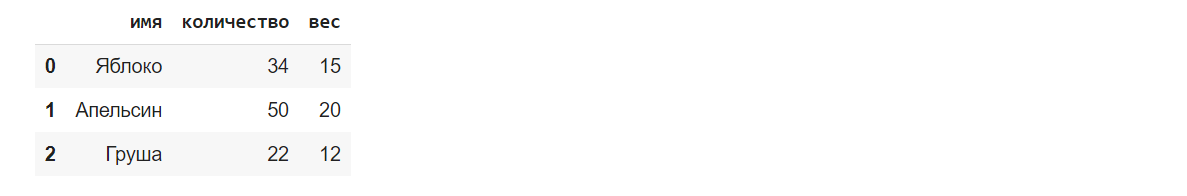

In [3]:
cursor.execute('''CREATE TABLE IF NOT EXISTS Фрукт (
    имя TEXT,
    количество INTEGER,
    вес INTEGER
  )''')
db.commit() # сохранение

* **INTEGER** - это целые числа со знаком, которые могут занимать от 1 до 8 байт в зависимости от величины числа.
* **REAL** - это числа с плавающей запятой, которые хранятся в формате IEEE 754 и занимают 8 байт.
* **TEXT** - это любой текст, который хранится в кодировке UTF-8, UTF-16 или UTF-16BE. SQLite автоматически определяет и преобразует кодировку при чтении и записи текста.
* **BLOB** - это данные, которые хранятся в том виде, как были добавлены, например содержимое файла. SQLite не интерпретирует и не преобразует эти данные.

Посмотреть на таблицы в БД (у нас пока одна)

In [4]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
table =  cursor.fetchall()
table

[('Фрукт',)]

In [5]:
df = pd.DataFrame(table, columns=['Таблицы БД'])
df

,Таблицы БД
0,Фрукт


> Добавим ещё одну таблицу

In [6]:
# Добавим ещё одну таблицу
cursor.execute('''CREATE TABLE IF NOT EXISTS Страна (
    имя TEXT,
    количество INTEGER,
    вес INTEGER
  )''')
db.commit() # сохранение

In [7]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
table =  cursor.fetchall()

In [8]:
df = pd.DataFrame(table, columns=['Таблицы БД'])
df

,Таблицы БД
0,Фрукт
1,Страна


In [9]:
# Содержимое таблицы Фрукты
cursor.execute("SELECT * FROM Фрукт")
cursor.fetchall()

[]

### ***INSERT (добавление значений в пустую таблицу)***

In [10]:
# Заполняем таблицу значениями
cursor.execute('''INSERT INTO Фрукт (имя, количество, вес)
                 VALUES ('яблоко', 34, 15),
                        ('апельсин', 50, 20),
                        ('груша', 22, 12)
                        ''')

db.commit() # сохранение

Выведем содержимое таблицы через pandas

In [11]:
# Содержимое таблицы Фрукты
cursor.execute("SELECT * FROM Фрукт")
data = cursor.fetchall()
data

[('яблоко', 34, 15), ('апельсин', 50, 20), ('груша', 22, 12)]

In [12]:
df = pd.DataFrame(data, columns=['имя', 'количество', 'вес'])
df

,имя,количество,вес
0,яблоко,34,15
1,апельсин,50,20
2,груша,22,12


### ***UPDATE (изменим/обновим данные таблицы)***

In [13]:
# Используем объект cursor, который позволяет выполнять SQL-запросы к базе данных
cursor.execute('''
  UPDATE Фрукт
  SET количество = 100, вес = 200
  WHERE имя = 'яблоко'
''')
db.commit()

In [14]:
# Содержимое таблицы Фрукты
cursor.execute("SELECT * FROM Фрукт")
data = cursor.fetchall()
pd.DataFrame(data, columns=['имя', 'количество', 'вес'])

,имя,количество,вес
0,яблоко,100,200
1,апельсин,50,20
2,груша,22,12


### ***SELECT (выбор по условию)***

In [15]:
# Используем объект cursor, который позволяет выполнять SQL-запросы к базе данных
cursor.execute('''
  SELECT * FROM Фрукт
  WHERE вес < 200
''')
# Используем метод fetchall(), чтобы получить список всех строк
rows = cursor.fetchall()

pd.DataFrame(rows, columns=['имя', 'количество', 'вес'])

,имя,количество,вес
0,апельсин,50,20
1,груша,22,12


### ***DELETE (удалим таблицу "Страны")***

In [16]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
table =  cursor.fetchall()
pd.DataFrame(table, columns=['Таблицы БД'])

,Таблицы БД
0,Фрукт
1,Страна


In [17]:
cursor.execute("SELECT * FROM sqlite_master")
table =  cursor.fetchall()
table

[('table',
  'Фрукт',
  'Фрукт',
  2,
  'CREATE TABLE Фрукт (\n    имя TEXT,\n    количество INTEGER,\n    вес INTEGER\n  )'),
 ('table',
  'Страна',
  'Страна',
  3,
  'CREATE TABLE Страна (\n    имя TEXT,\n    количество INTEGER,\n    вес INTEGER\n  )')]

In [18]:
cursor.execute('''
  DROP TABLE Страна
''')
db.commit()

In [19]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
table =  cursor.fetchall()
pd.DataFrame(table, columns=['Таблицы БД'])

,Таблицы БД
0,Фрукт


# Подведение итогов лекции

>*В этой лекции мы изучили, как работать с табличными данными в Python с помощью библиотеки Pandas. Мы научились загружать, создавать, фильтровать, изменять, анализировать и сохранять данные в разных форматах с помощью объекта DataFrame, его методов и атрибутов. Мы также изучили, как работать с базами данных в Pandas с помощью модуля **sqlalchemy** и создавать отдельные запросы SQL (Create-Read-Update-Delete) с помощью **sqlite3**.*